In [6]:
%matplotlib widget
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>

Az $a=d=2$, $b=c=1$, $x_0=2$, $y_0=3$ esetben a beépített megoldó segítségével oldd meg a Lotka-Volterra modellt megadó Cauchy-feladatot, majd ábrázold a $x(t)$ és $y(t)$ függvényeket, valamint az $(x(t),y(t))$ pályagörbét a $[0,27]$ időintervallumon!

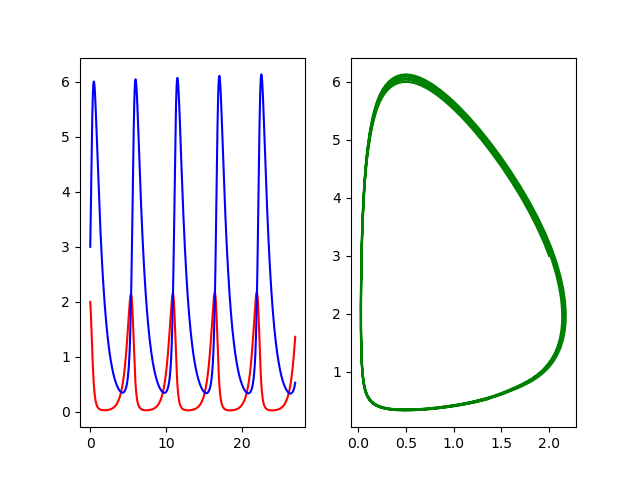

In [2]:
def lotkavolterra(t, kezdoertek, a, b, c, d):
    x, y = kezdoertek
    return [a*x - b*x*y, -c*y + d*x*y]

def feladat1():
    a = 2
    d = 2
    b = 1
    c = 1
    x0 = 2
    y0 = 3
    t_max = 27        
    fig,(ax1, ax2) = plt.subplots(1, 2)

    num_sol2 = solve_ivp(lotkavolterra, [0,t_max], [x0,y0], args=(a,b,c,d), dense_output=True)
    t_vals = np.linspace(0,t_max,1000)
    ax1.plot(t_vals, num_sol2.sol(t_vals)[0], 'r-')
    ax1.plot(t_vals, num_sol2.sol(t_vals)[1], 'b-')  
    ax2.plot(num_sol2.sol(t_vals)[0],num_sol2.sol(t_vals)[1],"g-")

feladat1()

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3>

Készíts egy ábrát, amelyen megjeleníted az (1)-es és (2)-es egyenletek megoldását a $[0,10]$ időintervallumon, a $\varphi(0)=\varphi_0$ és $\varphi'(0)=0$ kezdeti feltételek mellett!  
Legyen $l=10\text{ m}$, $g=9{,}81\text{ m/s}^\text{2}$ és a $\varphi_0$ értékét ```interact``` segítségével lehessen változtatni a $\left[-\frac{\pi}{2},\frac{\pi}{2}\right]$ intervallumon!


interactive(children=(FloatSlider(value=0.0, description='phi', max=1.5707963267948966, min=-1.570796326794896…

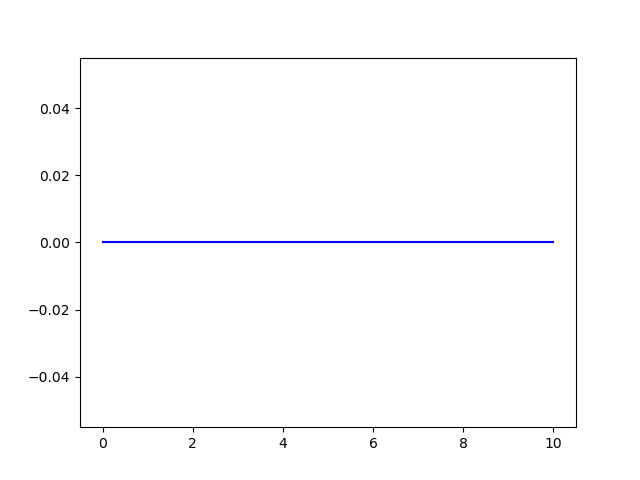

In [7]:
def feladat2():
    def elso(t, kezdoertek, g, l):
        phi, w = kezdoertek
        return [w, -g/l * np.sin(phi)] 

    def masodik(t, kezdoertek, g, l):
        phi, w = kezdoertek
        return [w, -g/l * phi] 
    
    g = 9.81
    l = 10
    t_max = 10
    fig, ax = plt.subplots()
    def update(phi = 0):
        ax.clear()
        phi0 = phi
        phi0deriv = 0
        elso_diffegy = solve_ivp(elso, [0, t_max], [phi0, phi0deriv], args=[g, l], dense_output=True)
        masodik_diffegy = solve_ivp(masodik, [0, t_max], [phi0, phi0deriv], args=[g, l], dense_output=True)
        t_vals = np.linspace(0,t_max,1000)
        ax.plot(t_vals, elso_diffegy.sol(t_vals)[0], 'r-')
        ax.plot(t_vals, masodik_diffegy.sol(t_vals)[0], 'b-')  

    widgets.interact(update,phi=(-np.pi / 2, np.pi / 2, 0.01))

feladat2()

<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (+2 pont)</h3>

A $\varphi(0)=30^\circ$, $\varphi'(0)=0$ esetben készíts egy animációt a mozgó ingáról! Az animációban jelenítsd meg a fonalat a ráerősített testtel együtt!

interactive(children=(Play(value=0, description='t'), Output()), _dom_classes=('widget-interact',))

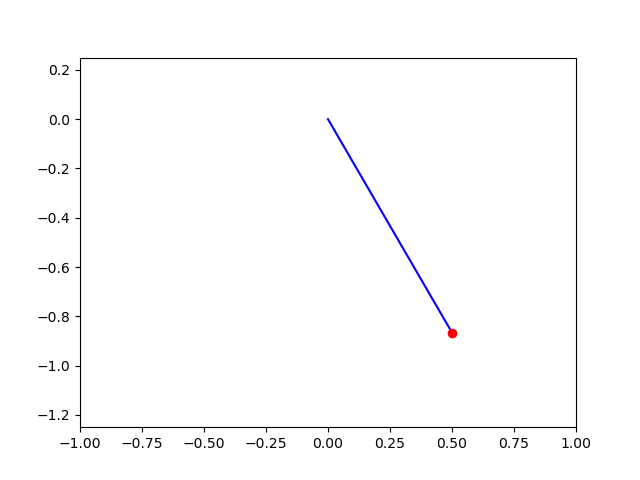

In [8]:
def feladat3():
    def elso(t, kezdoertek, g, l):
        phi, w = kezdoertek
        return [w, -g/l * np.sin(phi)] 
    
    g = 9.81
    l = 10
    t_max = 10
    fig, ax = plt.subplots()
    def update(t = 0):
        t = t / 10
        ax.clear()
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1.25, 0.25)
        phi0 = np.pi / 6
        phi0deriv = 0
        diffegy = solve_ivp(elso, [0, t_max], [phi0, phi0deriv], args=[g, l], dense_output=True)
        phi = diffegy.sol(t)[0]
        ax.plot([0, np.sin(phi)], [0, -np.cos(phi)], 'b-')
        ax.plot(np.sin(phi), -np.cos(phi), 'ro')
        
    widgets.interact(update, t=widgets.Play(0, 0, t_max * 10))

feladat3()

<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (2 pont)</h3>

Implementáld az Euler-módszert általános $f$, $x_0$, $x_1$, $y_0$ és $n$ paraméterekre.  
Az implementációt felhasználva oldd meg numerikusan az $y'(x) = x\cdot y(x)$, $y(0)=1$ Cauchy-feladatot az $x\in[0,2]$ intervallumon és ábrázold a közelítő megoldást a szimbolikus megoldással együtt.  
Az $n$ értéke ```interact``` segítségével legyen változtatható $1$ és $50$ között.

interactive(children=(IntSlider(value=50, description='n', max=50, min=1), Output()), _dom_classes=('widget-in…

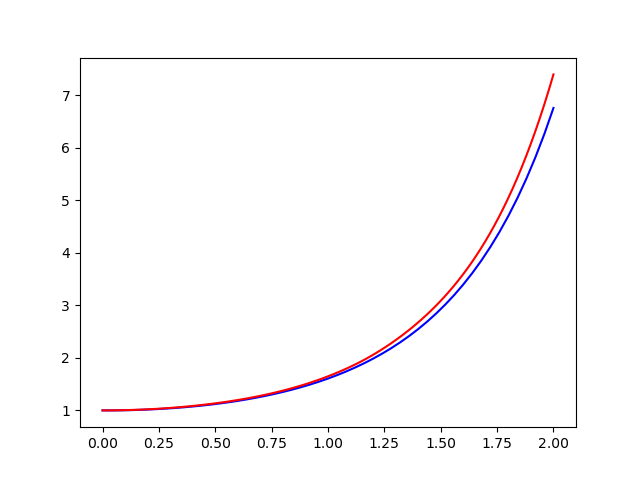

In [9]:
def feladat4():
    def f(x, yx):
        return x * yx

    x = [0, 2]
    y0 = 1
    fig, ax = plt.subplots()
    def euler(n=50):
        ax.clear()
        u = [x[0]]
        v = [y0]
        h = (x[1] - x[0]) / n
        for k in range(0, n):
            u.append(u[k] + h)
            v.append(v[k] + f(u[k], v[k] * h))
        ax.plot(u, v, 'b-')

        num_sol = solve_ivp(f, x, [y0], dense_output=True)
        x_vals = np.linspace(0, 2, 100)
        y_vals = num_sol.sol(x_vals)[0]
        ax.plot(x_vals, y_vals, 'r-')

    widgets.interact(euler, n=(1, 50))

feladat4()
